<a href="https://colab.research.google.com/github/zhrnnsw/Machine-Learning/blob/main/week-9/Praktikum%20Pertemuan%209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laporan Praktikum Pertemuan 9 - Perceptron dan ANN**
---


> Nama: Zahra Annisa Wahono
>
> Kelas: TI-3H / 29
>
> NIM: 2141720016

## **Praktikum 1 - Klasifikasi Iris dengan Perceptron**

## **Deskripsi**

Pada pratikum ini, Anda diminta untuk melakukan klasifikasi bunga iris dengan menggunakan model Perceptron. Anda dapat menggunakan dataset iris pada praktikum sebelumnya.
Untuk nembah pemahaman Anda terkait dengan model Perceptron, pada pratkikum ini Anda akan membuat model Perceptron tanpa menggunakan library.

### **Langkah 1 - Import Library**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### **Langkah 2 - Load Data dan Visualisasi**

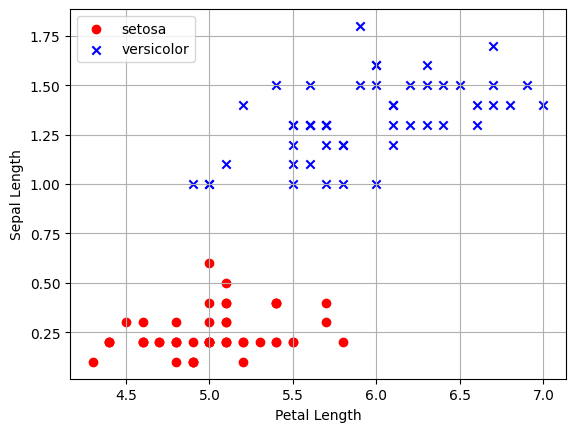

In [ ]:
df = pd.read_csv('iris.csv', header=None)
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

### **Langkah 3 - Membuat Kelas Perceptron**

In [ ]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### **Langkah 4 - Pilih Data dan Encoding Label**

In [ ]:
y = df.iloc[0:100, 4].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [0, 3]].values # slice data latih

### **Langkah 5 - Fitting Model**

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

### **Langkah 6 - Visualisasi Nilai Error Per Epoch**

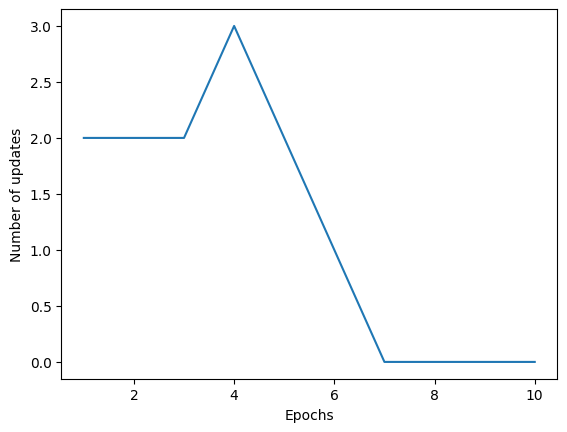

In [ ]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

### **Langkah 7 - Visualiasasi Decision Boundary**

In [ ]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

## **Praktikum 2 - Klasifikasi Berita dengan Perceptron**

**Deskripsi**

Dalam kasus ini, Anda akan melakukan klasifiaksi berita berdasarkan 3 kategori, yaitu Sport Hockey, Sport Baseball, dan Otomotif. Proses klasifikasi akan menggunakan model Perceptron.

### **Langkah 1 - Import Library**

In [ ]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

### **Langkah 2 - Pilih Label dan Split Data**

In [ ]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

### **Langkah 3 - Ekstrak Fitur dan Buat Model Perceptron**

In [ ]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



Penjelasan

Dataset yang digunakan pada kode program diatas adalah 20newsgroup yang terdiri dari sekitar 20.000 dokumen. Scikit-learn bahkan menyediakan fungsi yang memberikan kemudahan untuk mengunduh dan membaca kumpulan dataset dengan menggunakan sklearn.datasets. pada kode program diatas Perceptron mampu melakukan klasifikasi multikelas; strategi yang digunakan adalah one-versus-all untuk melakukan pelatihan untuk setiap kelas dalam data training. Dokumen teks memerlukan ekstraksi fitur salah satunya adalah bobot tf-idf pada kodeprogram diatas digunakan tfidf-vectorizer.

## **Praktikum 3 - Nilai Logika XOR dengan MLP**

**Deskripsi**

Pada kasus sederhana ini, Anda akan menggunakan MLP untuk mendapatkan nilai biner yang dioperasikan dengan logika XOR. Perlu diingat bahwa nilai XOR berbeda dengan OR, XOR hanya akan bernilai benar jika salah satu nilai yang benar, bukan keduanya atau tidak sama sekali.

### **Langkah 1 - Import Library**

In [ ]:
from sklearn.neural_network import MLPClassifier

### **Langkah 2 - Buat Data**

In [ ]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

### **Langkah 3 - Fit Model**

In [ ]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

### **Langkah 4 - Prediksi**

In [ ]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


## **Praktikum 4 - Klasifikasi dengan ANN**

### **Pra Pengolahan Data**

**Langkah 1 - Import Library**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

**Langkah 2 - Load Data**

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


**Langkah 3 - Encoding Data Kategorikal**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

**Langkah 4 - Encoding Kolom "Geography" dengan One Hot Encoder**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

**Langkah 5 - Split Data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Langkah 6 - Scaling Fitur**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### **Membuat Model ANN**

**Langkah 1 - Inisiasi Model ANN**

In [ ]:
ann = tf.keras.models.Sequential()

**Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama**

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

**Langkah 3 - Membuat Hidden Layer Kedua**

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

**Langkah 4 - Membuat Output Layer**

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### **Training Model**

**Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN**

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Langkah 2 - Fitting Model**

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 2s 2ms/step - loss: 0.5350 - accuracy: 0.7670
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.7997
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4566 - accuracy: 0.8048
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4457 - accuracy: 0.8073
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4395 - accuracy: 0.8083
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4354 - accuracy: 0.8092
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4310 - accuracy: 0.8104
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4269 - accuracy: 0.8124
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4227 - accuracy: 0.8149
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4178 - accura

### **Membuat Prediksi**

**Langkah 1 - Modelkan Data Baru dan Buat Prediksi**

In [ ]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 23ms/step
[[False]]


**Langkah 2 - Prediksi Dengan Data Testing**

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


**Langkah 3 - Cek Akurasi dan Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1516   79]
 [ 199  206]]


0.861

## **Tugas**


*  Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
*  Anda diperbolehkan melakukan eksplorasi terhadap,
    1. Metode pra pengolahan
    2. Pemilihan fitur
    3. Arsitektur ANN
    4. Fungsi Aktiviasi

*  ANN diimplementasikan dengan menggunakan tensorflow.
*  DIKERJAKAN SECARA BERKELOMPOK
*  JELASKAN HASIL YANG ANDA DAPATKAN,
    1. AKURASI
    2. CONFUSION MATRIX
    3. KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from tensorflow.keras.optimizers import Adam

## **Load Data**

In [ ]:
# Unduh dataset MNIST dari scikit-learn
mnist = fetch_openml('mnist_784')



/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
# Pisahkan data gambar dan label
X = mnist.data.astype('float32')
y = mnist.target.astype('int')

## **Pra-pemrosesan**

### **Scaling**

In [ ]:
X /= 255.0

### **Flatten**

In [ ]:
#images = images.values.reshape(images.shape[0], -1)

## **Split Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Ektraksi Fitur**

In [ ]:
# Inisialisasi objek PCA dengan jumlah komponen yang diinginkan (misalnya, 100 komponen)
n_components = 200  # Ubah sesuai dengan kebutuhan Anda
pca = PCA(n_components=n_components)

# Fit-transform pada data pelatihan
X_train_pca= pca.fit_transform(X_train)

# Transformasi data pengujian
X_test_pca = pca.transform(X_test)

## **Arsitektur Model ANN**

In [ ]:
model = models.Sequential([
    layers.Flatten(input_shape=(n_components,)),
    #layers.Input(shape = n_components),
    layers.Dense(n_components, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

## **Kompilasi Model**

In [ ]:
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 200)               40200     
                                                                 
 dense_4 (Dense)             (None, 64)                12864     
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 53714 (209.82 KB)
Trainable params: 53714 (209.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **Training Model**

In [ ]:
history = model.fit(X_train_pca, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1400/1400 [==============================] - 6s 3ms/step - loss: 0.2670 - accuracy: 0.9242 - val_loss: 0.1282 - val_accuracy: 0.9609
Epoch 2/20
1400/1400 [==============================] - 4s 3ms/step - loss: 0.0841 - accuracy: 0.9756 - val_loss: 0.0991 - val_accuracy: 0.9692
Epoch 3/20
1400/1400 [==============================] - 8s 6ms/step - loss: 0.0500 - accuracy: 0.9846 - val_loss: 0.0952 - val_accuracy: 0.9706
Epoch 4/20
1400/1400 [==============================] - 7s 5ms/step - loss: 0.0281 - accuracy: 0.9912 - val_loss: 0.1028 - val_accuracy: 0.9706
Epoch 5/20
1400/1400 [==============================] - 5s 4ms/step - loss: 0.0213 - accuracy: 0.9931 - val_loss: 0.1098 - val_accuracy: 0.9709
Epoch 6/20
1400/1400 [==============================] - 4s 3ms/step - loss: 0.0143 - accuracy: 0.9957 - val_loss: 0.1128 - val_accuracy: 0.9705
Epoch 7/20
1400/1400 [==============================] - 4s 3ms/step - loss: 0.0143 - accuracy: 0.9951 - val_loss: 0.1200 - val_accuracy:

In [ ]:
# Kemudian Anda dapat mengakses informasi seperti ini:
loss = history.history['loss']  # Histori nilai loss pada setiap epoch
val_loss = history.history['val_loss']  # Histori nilai loss pada setiap epoch saat validasi
accuracy = history.history['accuracy']  # Histori nilai akurasi pada setiap epoch
val_accuracy = history.history['val_accuracy']  # Histori nilai akurasi pada setiap epoch saat validasi

print("Loss:")
print(loss)

print("Validation Loss:")
print(val_loss)

print("Accuracy:")
print(accuracy)

print("Validation Accuracy:")
print(val_accuracy)

Loss:
[0.26722991466522217, 0.08734834939241409, 0.05169715732336044, 0.03101269342005253, 0.020469175651669502, 0.016360601410269737, 0.014207848347723484, 0.009887398220598698, 0.01283486932516098, 0.008270366117358208, 0.008009287528693676, 0.01104703452438116, 0.0074906861409544945, 0.007227153051644564, 0.008562306873500347, 0.006746431812644005, 0.008777963928878307, 0.005214254837483168, 0.005825166590511799, 0.007684025913476944]
Validation Loss:
[0.127116858959198, 0.10628537088632584, 0.09841268509626389, 0.09847553074359894, 0.10837274044752121, 0.11007987707853317, 0.11514881998300552, 0.11931398510932922, 0.1324738711118698, 0.12975049018859863, 0.14111487567424774, 0.14989504218101501, 0.14022961258888245, 0.15102607011795044, 0.158934086561203, 0.17386505007743835, 0.1554221361875534, 0.1555083841085434, 0.17350153625011444, 0.18121303617954254]
Accuracy:
[0.9233705401420593, 0.9738616347312927, 0.9841517806053162, 0.9905580282211304, 0.9939285516738892, 0.99455356597900

## **Evaluasi Model**

**Membuat Prediksi**

438/438 [==============================] - 4s 9ms/step


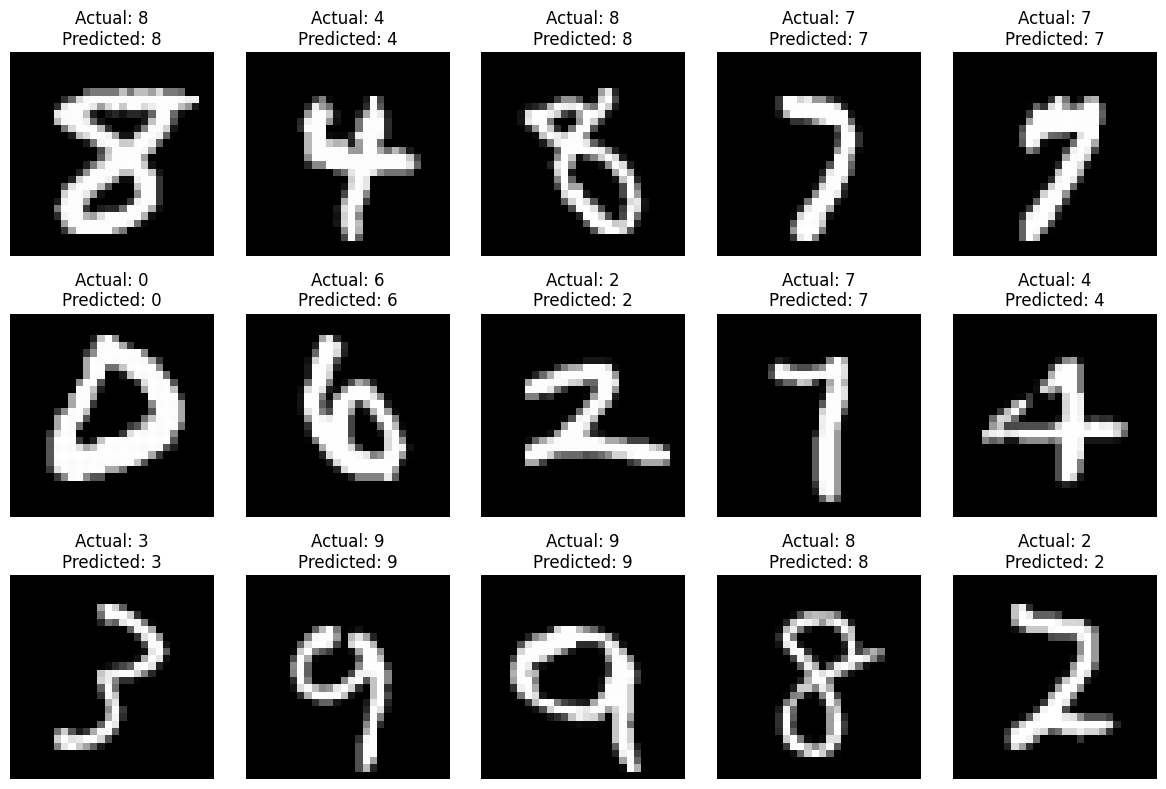

In [ ]:
# Membuat prediksi pada data pengujian
predictions = model.predict(X_test_pca)
y_pred = np.argmax(predictions, axis=1)

# Menampilkan beberapa contoh hasil prediksi
num_examples_to_show = 15  # Ubah sesuai kebutuhan

# Mengatur tata letak subplot menjadi 3 baris dan 5 kolom (3x5)
fig, axes = plt.subplots(3, 5, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5)

for i in range(num_examples_to_show):
    sample_image = X_test.iloc[i].values
    actual_label = y_test.iloc[i]
    predicted_label = y_pred[i]

    # Menampilkan gambar di subplot yang sesuai
    ax = axes[i // 5, i % 5]
    ax.imshow(sample_image.reshape(28, 28), cmap='gray')

    # Memeriksa apakah label sesuai
    if actual_label == predicted_label:
        title_color = 'black'
    else:
        title_color = 'red'

    ax.set_title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

### **Akurasi**

In [ ]:
test_loss, test_acc = model.evaluate(X_test_pca, y_test)
print(f'Akurasi pada data pengujian: {test_acc:.2f}')

438/438 [==============================] - 2s 4ms/step - loss: 0.2025 - accuracy: 0.9709
Akurasi pada data pengujian: 0.97


In [ ]:
train_loss, train_acc = model.evaluate(X_train_pca, y_train)
print(f'Akurasi pada data pelatihan: {train_acc:.2f}')

1750/1750 [==============================] - 6s 3ms/step - loss: 0.0368 - accuracy: 0.9934
Akurasi pada data pelatihan: 0.99


### **Confusion Matriks**

In [ ]:
# Membuat matriks kebingungan
confusion = confusion_matrix(y_test, y_pred)
print('Matriks Kebingungan:')
print(confusion)

Matriks Kebingungan:
[[1314    1    3    0    3    3    6    6    4    3]
 [   0 1585    3    2    0    0    1    2    3    4]
 [   0    9 1340    4    9    2    4    5    3    4]
 [   0    4   16 1387    0   11    1    3    5    6]
 [   0    2    2    0 1255    0    4    4    1   27]
 [   3    3    1   14    1 1241    7    0    2    1]
 [   5    0    0    0    5    8 1373    1    4    0]
 [   2    7   18    1    4    0    0 1451    0   20]
 [   4   14    4   21    4   14    7    5 1270   14]
 [   4    7    2    5   11    7    0    5    3 1376]]


### **Konfigurasi Model**

???

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Unduh dataset MNIST dari scikit-learn
# mnist = fetch_openml('mnist_784')

# Pisahkan data gambar dan label
# images = mnist.data.astype('float32')
# labels = mnist.target.astype('int')

# Langkah 1: Pra-pemrosesan
images /= 255.0  # Skalakan data

# Bagi data menjadi data pelatihan dan pengujian
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Langkah 2: Definisikan arsitektur model ANN
model = models.Sequential([
    layers.Flatten(input_shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Langkah 3: Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Langkah 4: Latih model
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# Langkah 5: Evaluasi model pada data pengujian
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Akurasi pada data pengujian: {test_acc:.2f}')


Epoch 1/10
1400/1400 [==============================] - 7s 4ms/step - loss: 0.9425 - accuracy: 0.7258 - val_loss: 0.4920 - val_accuracy: 0.8630
Epoch 2/10
1400/1400 [==============================] - 7s 5ms/step - loss: 0.4331 - accuracy: 0.8767 - val_loss: 0.3719 - val_accuracy: 0.8954
Epoch 3/10
1400/1400 [==============================] - 5s 4ms/step - loss: 0.3534 - accuracy: 0.8978 - val_loss: 0.3249 - val_accuracy: 0.9057
Epoch 4/10
1400/1400 [==============================] - 7s 5ms/step - loss: 0.3120 - accuracy: 0.9085 - val_loss: 0.3033 - val_accuracy: 0.9111
Epoch 5/10
1400/1400 [==============================] - 5s 4ms/step - loss: 0.2824 - accuracy: 0.9177 - val_loss: 0.2817 - val_accuracy: 0.9153
Epoch 6/10
1400/1400 [==============================] - 8s 5ms/step - loss: 0.2592 - accuracy: 0.9234 - val_loss: 0.2610 - val_accuracy: 0.9255
Epoch 7/10
1400/1400 [==============================] - 5s 4ms/step - loss: 0.2389 - accuracy: 0.9296 - val_loss: 0.2408 - val_accuracy:

In [ ]:
# Evaluasi akurasi data pelatihan
train_loss, train_acc = model.evaluate(train_images, train_labels)
print(f'Akurasi pada data pelatihan: {train_acc:.2f}')

1750/1750 [==============================] - 4s 2ms/step - loss: 0.1935 - accuracy: 0.9417
Akurasi pada data pelatihan: 0.94


In [ ]:
# Kemudian Anda dapat mengakses informasi seperti ini:
loss = history.history['loss']  # Histori nilai loss pada setiap epoch
val_loss = history.history['val_loss']  # Histori nilai loss pada setiap epoch saat validasi
accuracy = history.history['accuracy']  # Histori nilai akurasi pada setiap epoch
val_accuracy = history.history['val_accuracy']  # Histori nilai akurasi pada setiap epoch saat validasi

In [ ]:
# Mencetak informasi yang diakses
print("Loss:")
print(loss)

print("Validation Loss:")
print(val_loss)

print("Accuracy:")
print(accuracy)

print("Validation Accuracy:")
print(val_accuracy)

Loss:
[0.9424716830253601, 0.4331307113170624, 0.353429913520813, 0.31197068095207214, 0.2823590934276581, 0.25920432806015015, 0.23888099193572998, 0.22136305272579193, 0.20498092472553253, 0.18995429575443268]
Validation Loss:
[0.49202147126197815, 0.3718964457511902, 0.3248710334300995, 0.3032955229282379, 0.28166893124580383, 0.26102757453918457, 0.2408055067062378, 0.23797552287578583, 0.20829184353351593, 0.20938457548618317]
Accuracy:
[0.7257589101791382, 0.8767187595367432, 0.8977901935577393, 0.9084598422050476, 0.9176785945892334, 0.9233928322792053, 0.9295982122421265, 0.9351562261581421, 0.9392410516738892, 0.9445981979370117]
Validation Accuracy:
[0.8630357384681702, 0.8953571319580078, 0.9057142734527588, 0.9110714197158813, 0.9152678847312927, 0.9255357384681702, 0.9293749928474426, 0.9293749928474426, 0.938660740852356, 0.9375892877578735]


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
